In [1]:
#from Historic_Crypto import HistoricalData
#eur = HistoricalData('ETH-EUR', 3600, '2020-01-01-00-00', verbose=False).retrieve_data()
#eur.to_csv("Ethereum-Europe.csv")

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

import tensorflow as tf

2021-08-12 15:31:38.818408: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-08-12 15:31:38.818438: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
df = pd.read_csv("Ethereum-Europe.csv")

In [3]:
df.head(5)

,time,low,high,open,close,volume
0,2020-01-01 01:00:00,114.91,116.59,114.98,116.59,700.279453
1,2020-01-01 02:00:00,116.42,116.95,116.68,116.88,182.791804
2,2020-01-01 03:00:00,116.00,116.89,116.89,116.26,21.248987
3,2020-01-01 04:00:00,116.14,116.46,116.30,116.21,43.647860
4,2020-01-01 05:00:00,116.19,116.39,116.26,116.36,37.751310


In [4]:
def extract (dataset, period = 72):
    X, y = [], []
    for i, v in enumerate(dataset):
        if i > period:
            X.append(dataset[i-period:i])
            y.append(v[-1])
    return np.asarray(X), np.asarray(y)

In [5]:
X, y = extract(df.iloc[:,1:5].to_numpy())
X.shape, y.shape

((14055, 72, 4), (14055,))

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [7]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.LSTM(units=32, activation="relu", input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(tf.keras.layers.Dropout(rate=0.2))
model.add(tf.keras.layers.Dense(units=1, activation="relu"))

model.compile(loss='mean_squared_error', optimizer='adam')
model.summary()

2021-08-12 14:37:55.608476: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2021-08-12 14:37:55.608508: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2021-08-12 14:37:55.608526: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (mattia-aspire): /proc/driver/nvidia/version does not exist
2021-08-12 14:37:55.608717: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 32)                4736      
_________________________________________________________________
dropout (Dropout)            (None, 32)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                 33        
Total params: 4,769
Trainable params: 4,769
Non-trainable params: 0
_________________________________________________________________


2021-08-12 14:38:06.728392: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


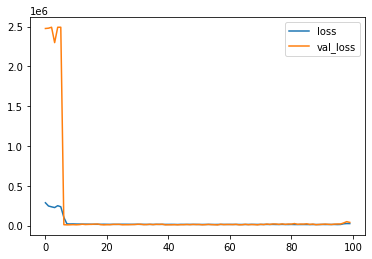

In [8]:
callbacks = [
    tf.keras.callbacks.EarlyStopping(
        monitor="val_loss",
        patience=50, 
        restore_best_weights=True,
        verbose=0
    )
]
    
history = model.fit(
    X_train, 
    y_train, 
    epochs=100, 
    batch_size=32, 
    validation_split=0.1, 
    verbose=False,
    callbacks=callbacks
)

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

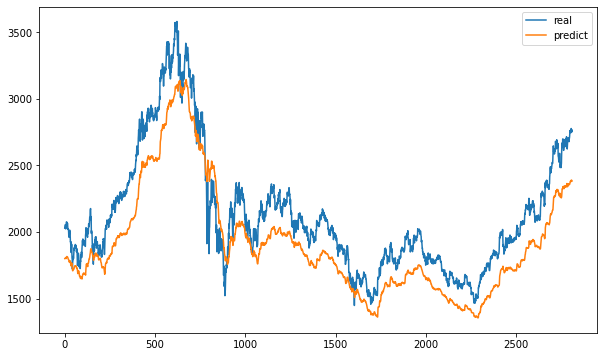

In [9]:
h_test = model.predict(X_test)

plt.figure(figsize=(10,6))
plt.plot(y_test, label="real")
plt.plot(h_test, label="predict")
plt.legend()
plt.show()